In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from connectivity import figures
from connectivity import visualize as vis

%reload_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/Users/maedbhking/.local/share/virtualenvs/cerebellum_connectivity-DbxULmID/lib/python3.7/site-packages/nilearn/datasets/__init__.py:90: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [2]:
# load train data

df_train = vis.get_summary(
            summary_type='train',
            exps=['sc1'],
            atlas=['tessels'],
            method=['WTA', 'ridge', 'lasso']
            )

In [3]:
# set plotting summary

vis.plotting_style()

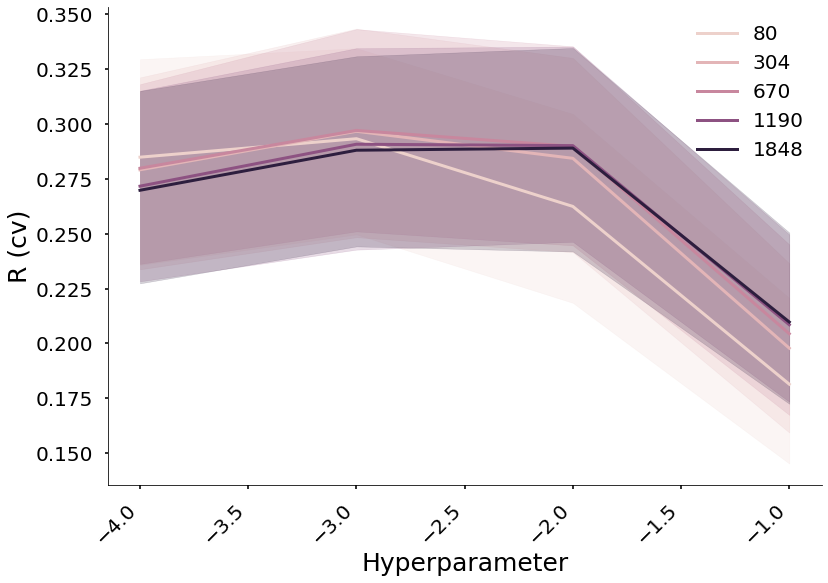

In [5]:
# train predictions (R CV: hyperparameter)

vis.plot_train_predictions(dataframe=df_train.query('hyperparameter>-5 and method=="lasso"'),
                          x='hyperparameter',
                          hue='num_regions'
                          ) 
plt.xlabel('Hyperparameter');

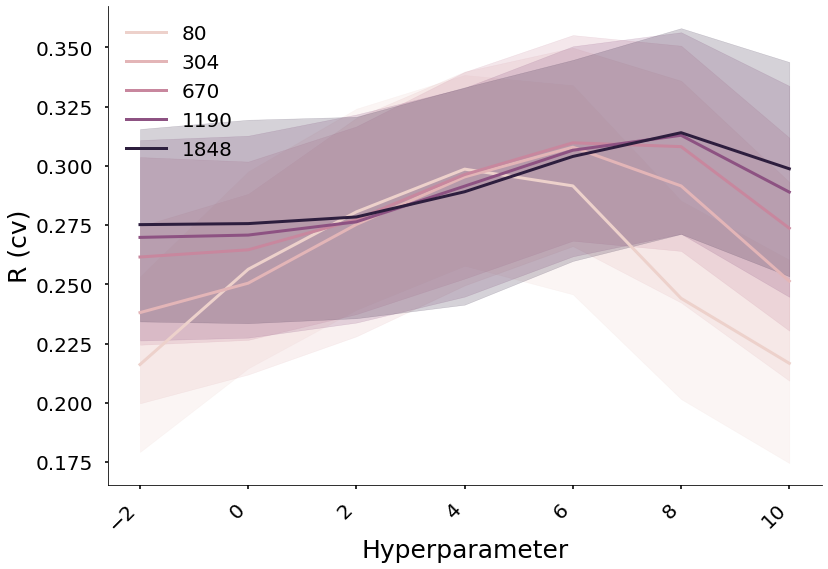

In [6]:
# train predictions (R CV: hyperparameter)

vis.plot_train_predictions(dataframe=df_train.query('method=="ridge"'),
                          x='hyperparameter',
                          hue='num_regions'
                          ) 
plt.xlabel('Hyperparameter');

In [8]:
# train predictions (R CV: hyperparameter)

# vis.plot_train_predictions(dataframe=df_train,
#                           x='num_regions',
#                           hue='model',
#                           best_models=True) 
# plt.xlabel('# of regions');

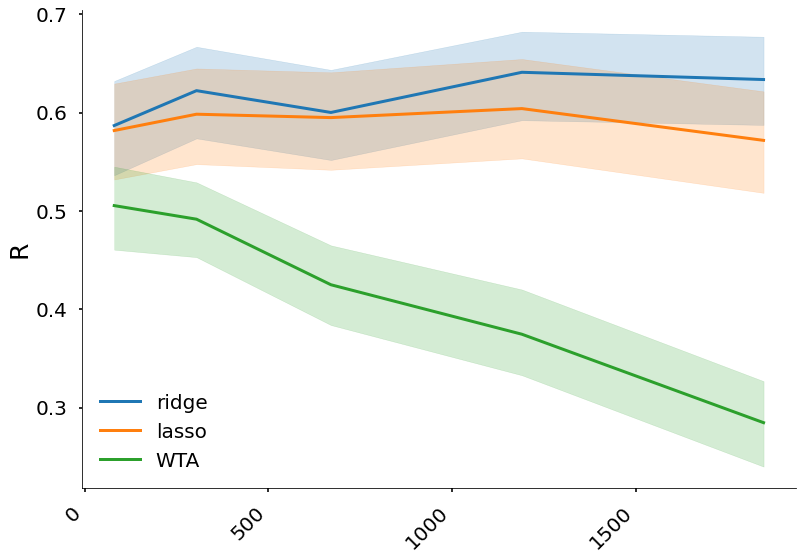

In [17]:
# EVAL predictions (R)

# load eval data

df_eval =  vis.get_summary(
            summary_type='eval',
            exps=['sc2'],
            summary_name=['weighted_all'],
            atlas=['tessels'],
            method=['WTA', 'ridge', 'lasso']
            )

vis.plot_eval_predictions(dataframe=df_eval,
                        normalized=True,
                        plot_noiseceiling=False,
                        x='num_regions', 
                        hue='method', 
                        )
plt.xticks([0, 500, 1000, 1500]);

best model is ridge_tessels1002_alpha_8


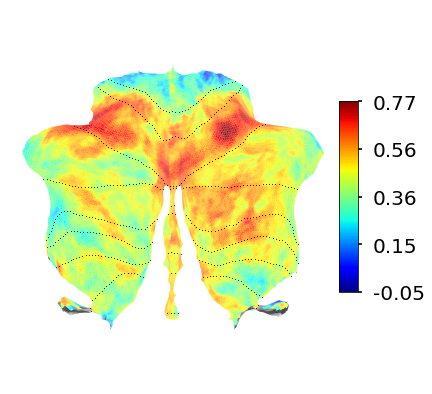

In [53]:
# plot eval map (R)

vis.map_eval_cerebellum(data="R", 
            exp="sc1", 
            model_name='best_model', 
            method='ridge',
            normalize=True,
            colorbar=True,
            title=False
            )

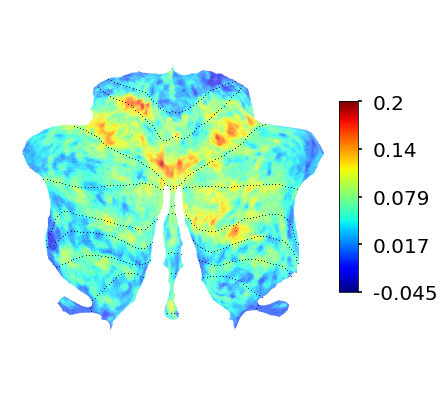

In [52]:
vis.map_eval_cerebellum(data="R", 
            exp="sc1", 
            model_name='WTA_tessels1002', 
            method='WTA',
            normalize=False,
            colorbar=True,
            title=False
            )

best model is lasso_tessels0362_alpha_-3


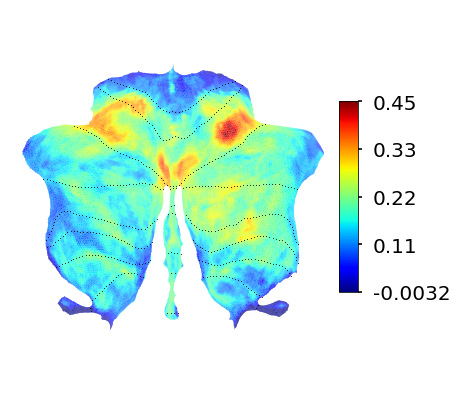

In [49]:
vis.map_eval_cerebellum(data="R", 
            exp="sc1", 
            model_name='best_model', 
            method='lasso',
            normalize=False,
            colorbar=True,
            title=False
            )

best model is WTA_tessels0042


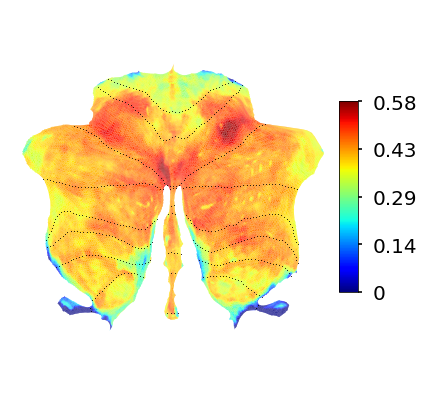

In [29]:
# plot noiseceiling (R)

vis.map_eval_cerebellum(data="noiseceiling_XY_R", 
            exp="sc1", 
            model_name='best_model', 
            method='WTA',
            colorbar=True,
            title=False
            )

best model is lasso_tessels0362_alpha_-3


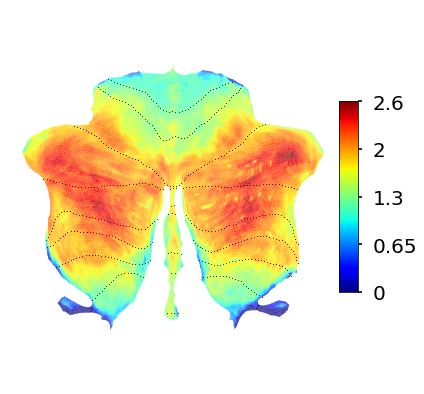

In [39]:
# plot lasso map

vis.map_lasso_cerebellum(model_name='best_model', # lasso_tessels0362_alpha_-3
            exp="sc1", 
            stat='percent', # percent
            colorbar=True)

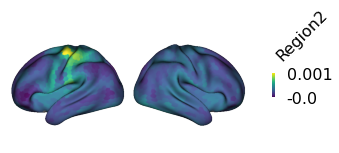

In [35]:
# map distances
vis.map_distances_cortex(model_name='ridge_tessels1002_alpha_8',
                atlas='MDTB10',
                surf='inflated',
                threshold=100,
                column=1
                )

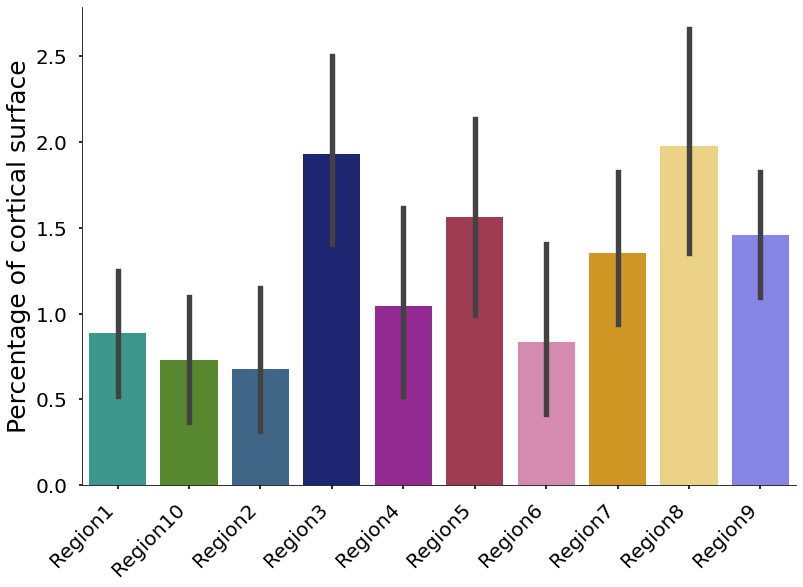

In [36]:
# plot surfaces

df = vis.plot_surfaces(x='reg_names',
                      hue=None,
                      cortex='tessels0042', 
                      method='lasso');

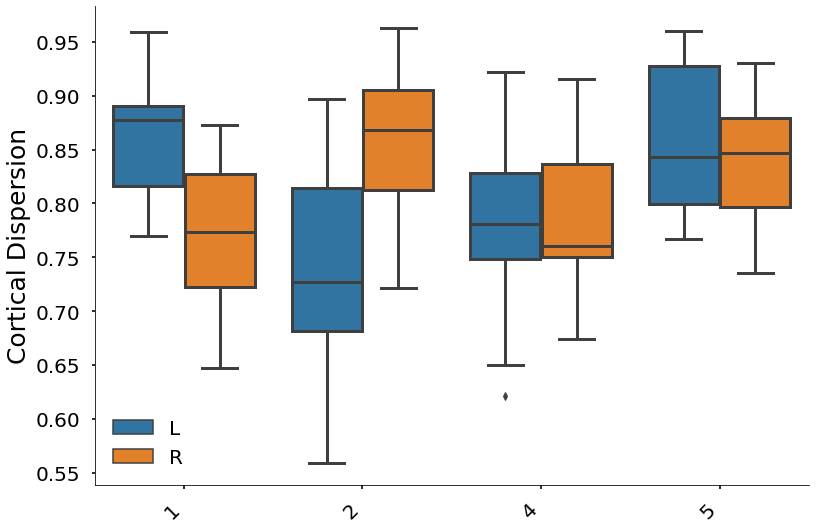

In [37]:
# plot dispersion

vis.plot_dispersion(
    y='var_w',    
    cortex='tessels1002', 
    atlas='MDTB10',
    regions=[1,2,4,5],
    );